In [1]:
%pylab inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# import plotly.plotly as py
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


,created_at,engine,fuel,voltage
681,2018-03-01 13:32:08,1,39.153328,630
682,2018-03-01 13:32:19,0,39.153328,630
683,2018-03-01 13:38:08,0,39.153328,630
684,2018-03-01 13:38:13,0,39.153328,630
685,2018-03-01 13:38:18,1,39.308480,620


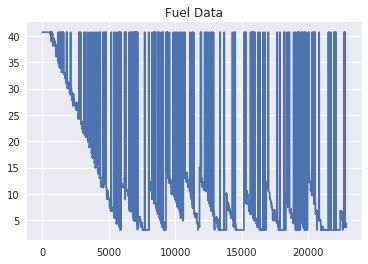

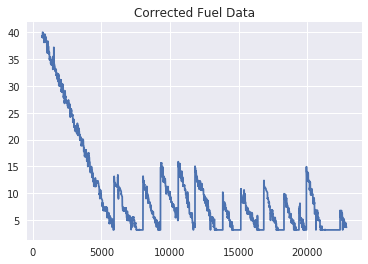

In [2]:
fileName = 'files/864811036264054_TOWNACE.csv'
max_fuel_limit = 40
num_packet_to_check = 20
df = pd.read_csv(fileName)
df['created_at'] = pd.to_datetime(df['created_at'])

df2 = df[df.fuel_litre < max_fuel_limit]
df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                    'engine': df2.engine_status,
                    'created_at':df2.created_at,
                    'voltage': df2.voltage})

plt.plot(df.fuel_litre)
plt.title('Fuel Data')
plt.figure()
plt.plot(df3.fuel)
plt.title('Corrected Fuel Data')
df3.head()

In [3]:
fuel = list(df3.fuel)

temp = fuel[0]
num_refill = 0
count = 0
refilled = []
for i,data in enumerate(fuel):
    if data - temp>5:
        count += 1
        if count > num_packet_to_check:
            num_refill += 1
            count = 0
            refilled.append(data-temp)
            print('\n# New Refill #')
            print('Current Fuel: {}'.format(data))
            print('prev Fuel: {}'.format(temp))
            print('Refill amount: {}'.format(data-temp))
            print('DateTime: {}'.format(df3.iloc[i,0]))
            
        else:
            continue
    count = 0
    temp = data

total_refilled = sum(refilled)
initial_fuel = fuel[0]
remaining_fuel = fuel[-1]
total_used = total_refilled - (initial_fuel + remaining_fuel)

print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
print('\nTotal Number of Refill: {}'.format(num_refill))
print('Total Refill Amount: {}'.format((refilled)))
print('\nTotal Refilled Fuel: {}'.format(total_refilled))
print('Total Used Fuel: {}'.format(total_used))
print('Total Fuel Remaining: {}'.format(remaining_fuel))



# New Refill #
Current Fuel: 12.921414464186851
prev Fuel: 3.294755696874297
Refill amount: 9.626658767312554
DateTime: 2018-03-12 10:49:28

# New Refill #
Current Fuel: 12.749821394031748
prev Fuel: 3.1870540847880484
Refill amount: 9.5627673092437
DateTime: 2018-03-14 17:56:05

# New Refill #
Current Fuel: 14.756911006713825
prev Fuel: 3.1870540847880484
Refill amount: 11.569856921925776
DateTime: 2018-03-16 23:11:12

# New Refill #
Current Fuel: 15.01303996375553
prev Fuel: 5.223550946904028
Refill amount: 9.789489016851501
DateTime: 2018-03-19 15:09:33

# New Refill #
Current Fuel: 14.756911006713825
prev Fuel: 3.7936662913483454
Refill amount: 10.96324471536548
DateTime: 2018-03-21 16:05:27

# New Refill #
Current Fuel: 9.677703248780356
prev Fuel: 3.1870540847880484
Refill amount: 6.490649163992307
DateTime: 2018-03-25 16:19:52

# New Refill #
Current Fuel: 10.574585624452178
prev Fuel: 3.1870540847880484
Refill amount: 7.3875315396641295
DateTime: 2018-03-28 11:56:53

# New Ref

In [4]:
def filter_fuel(data, prev_data, count,max_fuel_limit,num_packet_to_check):
    if data >= max_fuel_limit:
        z = prev_data
        return [z, prev_data, count]
    if data-prev_data>5:
        count += 1
        if count > num_packet_to_check:
            z = data
            refill = True
            fuel_refilled = data-prev_data
            count = 0
        else:
            z = prev_data
            return [z, prev_data, count]
    count = 0
    z = data
    prev_data = data
    return [z, prev_data, count]

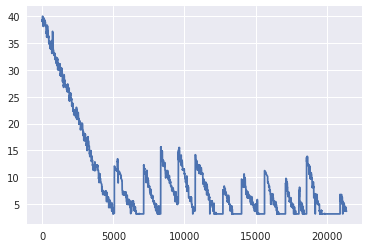

In [5]:
max_fuel_limit = 40
num_packet_to_check = 50
count = 0
new_data = []
for i,data in enumerate(fuel):
    if i == 0:
        data, prev_data, count = filter_fuel(data,data,count,max_fuel_limit,num_packet_to_check)
    else:
        data, prev_data, count = filter_fuel(data,prev_data,count,max_fuel_limit,num_packet_to_check)
        new_data.append(data)
        
plt.plot(new_data)

# Get Summary of all the files in a directory



---------------------------FILE NAME:.~lock.861001004607731_AXIO.csv#---------------------------------
@@@@@@@@@@@@@@@@@@@@@@@.~lock.861001004607731_AXIO.csv#Failed@@@@@@@@@@@@@@@@@@@@@@@@@@


---------------------------FILE NAME:.~lock.864287038359400_FORTUNER.csv#---------------------------------
@@@@@@@@@@@@@@@@@@@@@@@.~lock.864287038359400_FORTUNER.csv#Failed@@@@@@@@@@@@@@@@@@@@@@@@@@


---------------------------FILE NAME:.~lock.866192035922887_AXIO.csv#---------------------------------
@@@@@@@@@@@@@@@@@@@@@@@.~lock.866192035922887_AXIO.csv#Failed@@@@@@@@@@@@@@@@@@@@@@@@@@


---------------------------FILE NAME:861001003463219_X-COROLLA.csv---------------------------------

# New Refill #
Current Fuel: 41.142842099933354
prev Fuel: 20.879600177769333
Refill amount: 20.26324192216402
DateTime: 2018-03-16 18:05:34


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 1
Total Refill Amount: [20.26324192216402]

Total Refi



---------------------------FILE NAME:864287038320501_FORTUNER.csv---------------------------------

# New Refill #
Current Fuel: 56.419910149837825
prev Fuel: 43.069342356082096
Refill amount: 13.35056779375573
DateTime: 2018-03-09 16:05:41

# New Refill #
Current Fuel: 56.48700534007563
prev Fuel: 23.73340970702032
Refill amount: 32.75359563305531
DateTime: 2018-03-29 08:26:36

# New Refill #
Current Fuel: 55.517680418906345
prev Fuel: 24.725913947962265
Refill amount: 30.79176647094408
DateTime: 2018-04-09 07:50:54


###################################-S-U-M-M-A-R-Y-#####################################

Total Number of Refill: 3
Total Refill Amount: [13.35056779375573, 32.75359563305531, 30.79176647094408]

Total Refilled Fuel: 76.89592989775512
Total Used Fuel: -33.23919198372626
Total Fuel Remaining: 53.64811654190545


---------------------------FILE NAME:864287038320618_FORTUNER.csv---------------------------------

# New Refill #
Current Fuel: 60.51158314090127
prev Fuel: 33.

/home/clueless/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



# New Refill #
Current Fuel: 44.36864897752224
prev Fuel: 22.80799107747639
Refill amount: 21.56065790004585
DateTime: 2018-03-06 13:11:38

# New Refill #
Current Fuel: 46.3401952689667
prev Fuel: 14.147044906993433
Refill amount: 32.19315036197327
DateTime: 2018-03-08 20:26:01

# New Refill #
Current Fuel: 27.22395612120018
prev Fuel: 13.907117161059055
Refill amount: 13.316838960141126
DateTime: 2018-03-19 08:21:13

# New Refill #
Current Fuel: 45.990071857028504
prev Fuel: 12.606696733946734
Refill amount: 33.38337512308177
DateTime: 2018-03-20 09:23:55

# New Refill #
Current Fuel: 39.89072580510121
prev Fuel: 9.002966952762607
Refill amount: 30.887758852338607
DateTime: 2018-04-01 09:09:17

# New Refill #
Current Fuel: 33.95711410451519
prev Fuel: 27.821480628212427
Refill amount: 6.135633476302765
DateTime: 2018-04-01 23:47:28

# New Refill #
Current Fuel: 42.16109932218187
prev Fuel: 9.002966952762607
Refill amount: 33.15813236941926
DateTime: 2018-04-08 10:16:43


############

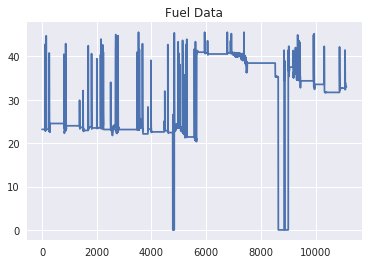

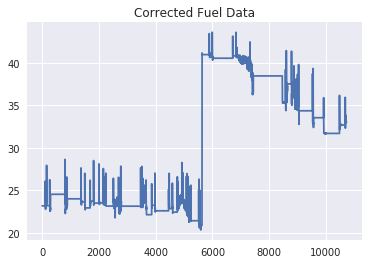

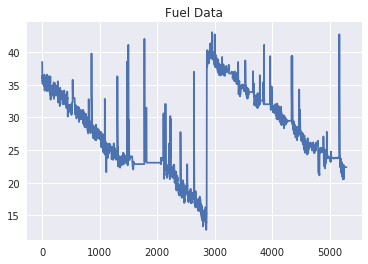

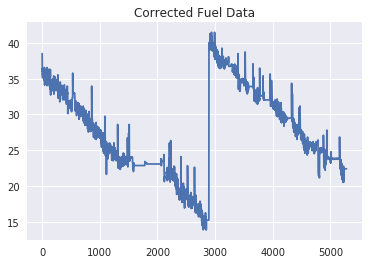

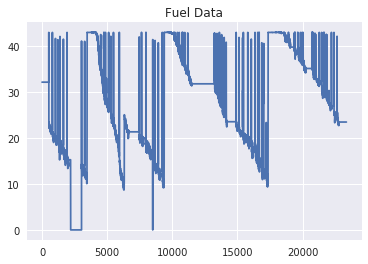

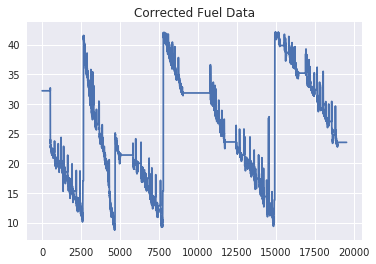

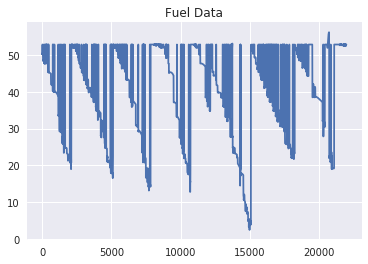

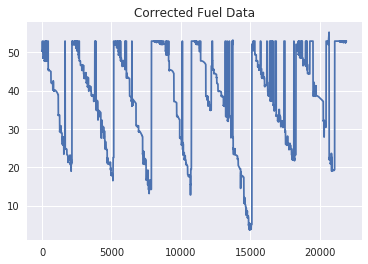

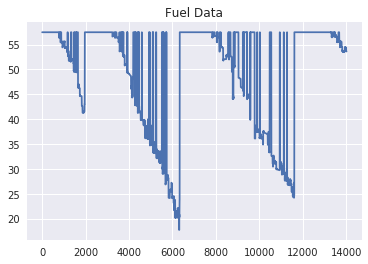

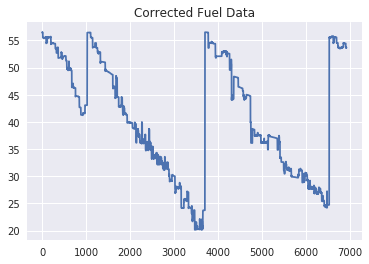

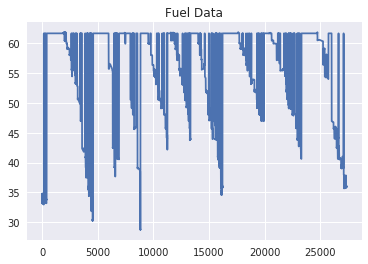

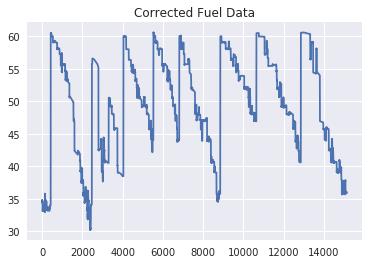

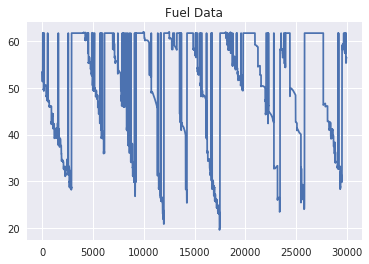

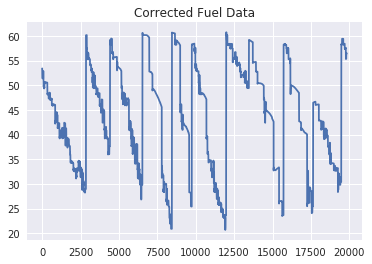

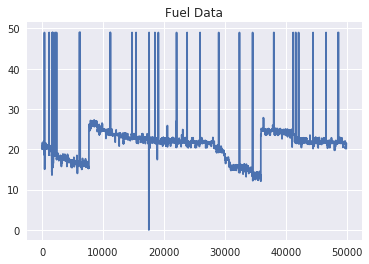

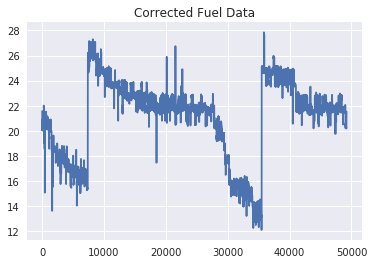

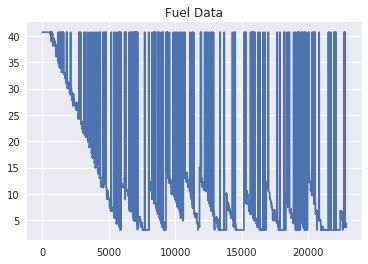

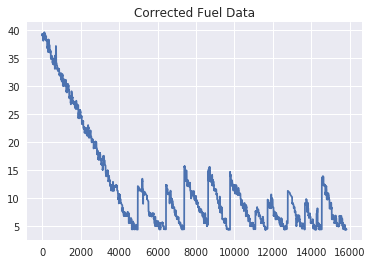

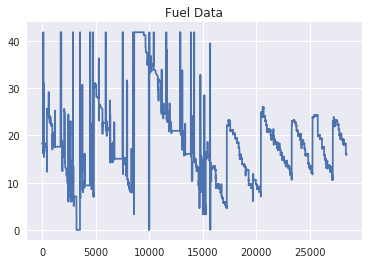

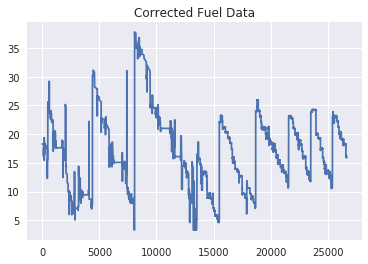

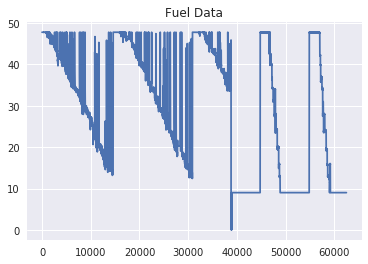

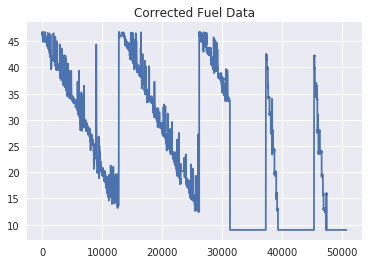

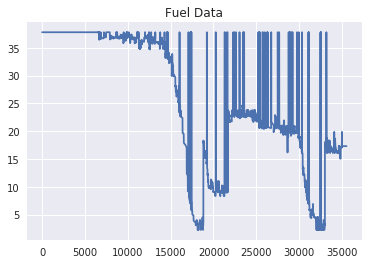

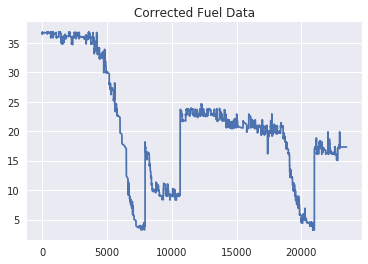

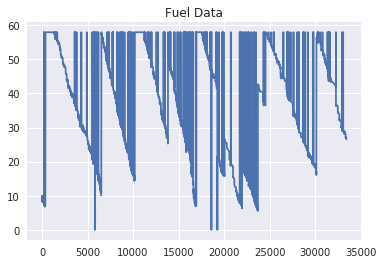

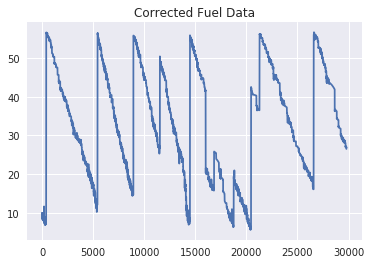

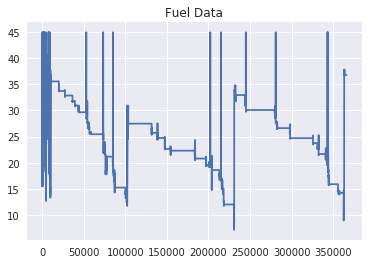

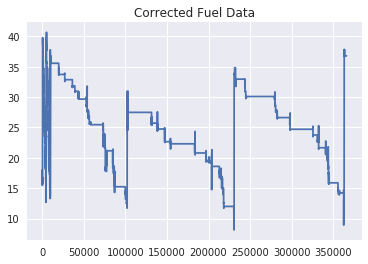

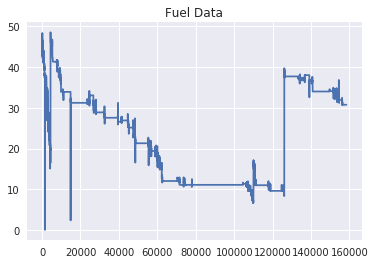

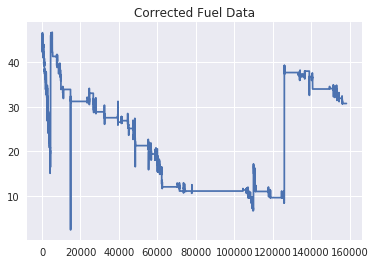

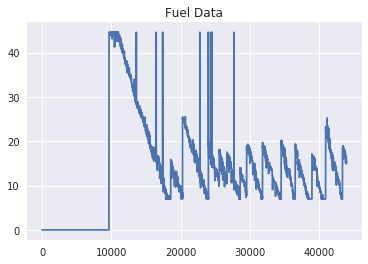

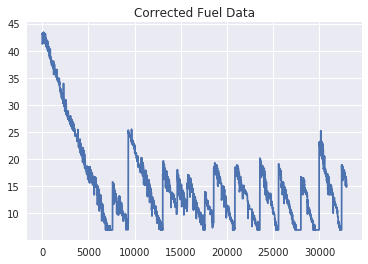

In [6]:
import os
files = os.listdir('files/')
num_packet_to_check = 40
folder = 'files/'
for fileName in files:
    
    try:
        print('\n\n---------------------------FILE NAME:'+ fileName + '---------------------------------')

        df = pd.read_csv(folder + fileName)
        min_fuel_limit = min(df.fuel_litre)+1
        max_fuel_limit = max(df.fuel_litre)-1
        min_fuel_refill = 5
        df['created_at'] = pd.to_datetime(df['created_at'])

        df2 = df[df['fuel_litre'].between(min_fuel_limit, max_fuel_limit, inclusive=False)]
    #     df2 = df[df.fuel_litre < max_fuel_limit]
        df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                            'engine': df2.engine_status,
                            'created_at':df2.created_at,
                            'voltage': df2.voltage})

        plt.figure()
        plt.plot(df.fuel_litre)
        plt.title('Fuel Data')
    #     df3.head()

        fuel = list(df3.fuel)
        temp = fuel[0]
        num_refill = 0
        count = 0
        refilled = []
        z = []
        for i,data in enumerate(fuel):
            if data - temp>=min_fuel_refill:
                count += 1
                if count > num_packet_to_check:
                    num_refill += 1
                    count = 0
                    refilled.append(data-temp)
                    z.append(data)
                    print('\n# New Refill #')
                    print('Current Fuel: {}'.format(data))
                    print('prev Fuel: {}'.format(temp))
                    print('Refill amount: {}'.format(data-temp))
                    print('DateTime: {}'.format(df3.iloc[i,0]))

                else:
                    z.append(temp)
                    continue
            z.append(data)
            count = 0
            temp = data

        total_refilled = sum(refilled)
        initial_fuel = fuel[0]
        remaining_fuel = fuel[-1]
        total_used = total_refilled - (initial_fuel + remaining_fuel)

        print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
        print('\nTotal Number of Refill: {}'.format(num_refill))
        print('Total Refill Amount: {}'.format((refilled)))
        print('\nTotal Refilled Fuel: {}'.format(total_refilled))
        print('Total Used Fuel: {}'.format(total_used))
        print('Total Fuel Remaining: {}'.format(remaining_fuel))
        
        plt.figure()
        plt.plot(z)
        plt.title('Corrected Fuel Data')
    except:
        print('@@@@@@@@@@@@@@@@@@@@@@@'+fileName + 'Failed@@@@@@@@@@@@@@@@@@@@@@@@@@')
        
    

In [7]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (14,6)

# Summary of specific DateTime Data 


In [8]:
fileName = 'files/861001004631186_F-Premio.csv'

df = pd.read_csv(fileName)
# df.columns.values
min_fuel_limit = min(df.fuel_litre)+1
max_fuel_limit = max(df.fuel_litre)-1
min_fuel_refill = 5
num_packet_to_check = 40

df['created_at'] = pd.to_datetime(df['created_at'])

df2 = df[df['fuel_litre'].between(min_fuel_limit, max_fuel_limit, inclusive=False)]
#     df2 = df[df.fuel_litre < max_fuel_limit]
df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                    'engine': df2.engine_status,
                    'created_at':df2.created_at})

# mask = (df3['created_at']>'2018-04-13') & (df3['created_at']<'2018-04-17')
# df3 = df3.loc[mask]

plt.figure()
plt.plot(df.fuel_litre)
plt.title('Fuel Data')
# print(df.created_at.head())
print('#######################FileName-'+fileName+'###########################')
fuel = list(df3.fuel)
temp = fuel[0]
num_refill = 0
count = 0
refilled = []
z = []
for i,data in enumerate(fuel):
    if data - temp>=min_fuel_refill:
        count += 1
        if count > num_packet_to_check:
            num_refill += 1
            count = 0
            refilled.append(data-temp)
            z.append(data)
            print('\n# New Refill #')
            print('Current Fuel: {}'.format(data))
            print('prev Fuel: {}'.format(temp))
            print('Refill amount: {}'.format(data-temp))
            print('DateTime: {}'.format(df3.iloc[i,0]))

        else:
            z.append(temp)
            continue
    z.append(data)
    count = 0
    temp = data

total_refilled = sum(refilled)
# initial_fuel = fuel[0]
# remaining_fuel = fuel[-1]
initial_fuel = z[0]
remaining_fuel = z[-1]
total_used = (total_refilled +initial_fuel) - remaining_fuel

print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
print('\nTotal Number of Refill: {}'.format(num_refill))
print('Total Refill Amount: {}'.format((refilled)))
print('\nTotal Refilled Fuel: {}'.format(total_refilled))
print('Total Used Fuel: {}'.format(total_used))
print('Total Fuel Remaining: {}'.format(remaining_fuel))

plt.figure()
plt.plot(z)
plt.title('Corrected Fuel Data')

FileNotFoundError: File b'files/861001004631186_F-Premio.csv' does not exist

# Summary generator (Updated)

* Remove garbage values above and under the minimum and maximum limit 
* Remove some data points just after engine start
* Check data for 40 packets to confirm a refill 

In [ ]:

#find minimum value for comparing with current data 

fileName = 'files/fiveVolt/861001004631186_F-Premio.csv'

df = pd.read_csv(fileName)
# df.columns.values
min_fuel_limit = 4+2#min(df.fuel_litre)+1  #Fuel Reserve Limit 
max_fuel_limit = 41-2#max(df.fuel_litre)-7 # Fuel Capacity Limit
min_fuel_refill = 5
num_packet_to_check = 40
df['created_at'] = pd.to_datetime(df['created_at'])

df2 = df[df['fuel_litre'].between(min_fuel_limit, max_fuel_limit, inclusive=False)]
#     df2 = df[df.fuel_litre < max_fuel_limit]
df3 = pd.DataFrame({'fuel': df2.fuel_litre,
                    'engine': df2.engine_status,
                    'created_at':df2.created_at})

# mask = (df3['created_at']>'2018-04-13') & (df3['created_at']<'2018-04-17')
# df3 = df3.loc[mask]

plt.figure()
plt.plot(df.created_at,df.fuel_litre)
plt.title('Fuel Data')
# print(df.created_at.head())
print('#######################FileName-'+fileName+'###########################')
fuel = list(df3.fuel)
temp = fuel[0]
num_refill = 0
count = 0
refilled = []
z = []
s=0
for i,data in enumerate(fuel):
    if i>0 and (df3.engine.iloc[i]-df3.engine.iloc[i-1]==1):
        s = 10
    if s>0:
        s -= 1
        continue
    if data - temp>=min_fuel_refill:
        count += 1
        if count > num_packet_to_check:
            num_refill += 1
            count = 0
            refilled.append(data-temp)
            z.append(data)
            print('\n# New Refill #')
            print('Current Fuel: {}'.format(data))
            print('prev Fuel: {}'.format(temp))
            print('Refill amount: {}'.format(data-temp))
            print('DateTime: {}'.format(df3.iloc[i,0]))

        else:
            z.append(temp)
            continue
    
#     if data<min_data:
#         min_data = data
    z.append(data)
    count = 0
    temp = data

total_refilled = sum(refilled)
# initial_fuel = fuel[0]
# remaining_fuel = fuel[-1]
initial_fuel = z[0]
remaining_fuel = z[-1]
total_used = (total_refilled +initial_fuel) - remaining_fuel

print('\n\n###################################-S-U-M-M-A-R-Y-#####################################')
print('\nTotal Number of Refill: {}'.format(num_refill))
print('Total Refill Amount: {}'.format((refilled)))
print('\nTotal Refilled Fuel: {}'.format(total_refilled))
print('Total Used Fuel: {}'.format(total_used))
print('Total Fuel Remaining: {}'.format(remaining_fuel))

plt.figure()
plt.plot(z)
plt.title('Corrected Fuel Data')

## Smoothing the signal and then find all Maxima and Minima to find the Refill values and points 

* Smooth Data after removing the bad data using a filter  
* Filter data with optimum window size. Window can be selected based on time data or data point??
* Find maximas and minima's of the data points
* Validate Refill points 

In [ ]:
'''
Smooth a signal using a suitable window.
Find details at: http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
'''

import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [ ]:
# df = pd.read_csv('/home/orion/git_projects/files/861001003463219_X-COROLLA.csv')
# print(df.fuel_litre.head())

# arr = np.array(df.fuel_litre)
arr = np.array(z)

y = smooth(arr,100,'hanning')
plt.plot(y)
plt.figure()
plt.plot(arr)

print('\nbefore smoothing: {}\nAfter Smoothing: {}'.format(len(arr), len(y)))

In [ ]:
def customFuelCompare(x1,x2):
    return x1>x2

In [ ]:
'''
Find Maxima and Minima's of the smoothed signal
'''
from scipy.signal import argrelextrema

x = np.array(y)

# for local maxima
argrelextrema(x, np.greater)

# for local minima
argrelextrema(x, np.less)

# find values at maxima

## order ## How many points on each side to use for the comparison to consider comparator(n, n+x) to be True.
maxims = x[argrelextrema(x, customFuelCompare, order=1000,mode='wrap')[0]] # mode default 'clip'. what is it??

#find values at minima 
minims = x[argrelextrema(x, np.less, order=1000)[0]]

print((maxims))
print(minims)

In [ ]:
print(len(maxims))
print(len(minims))

# Print Resume 

Check it out : https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.find_peaks_cwt.html

and this: https://github.com/MonsieurV/py-findpeaks

In [ ]:
x = np.linspace(-np.pi, 50*np.pi, 201)
y = np.linspace(-np.pi, 10*np.pi, 201)
sig = np.sin(x) + np.sin(y)

In [ ]:
plt.plot(sig)


In [ ]:
freqreal = np.fft.fft(np.array(z)).real
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freqreal)

# Smoothing Data with Butterworth Filter 

* Filter raw data for upper and lower bound
* Filter with butter filter 

/home/clueless/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


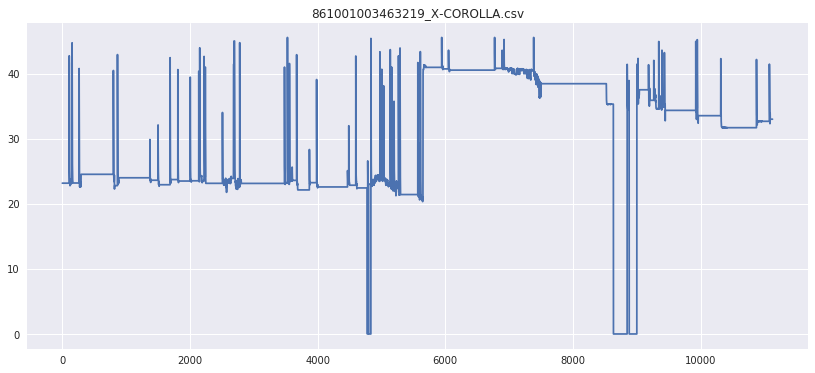

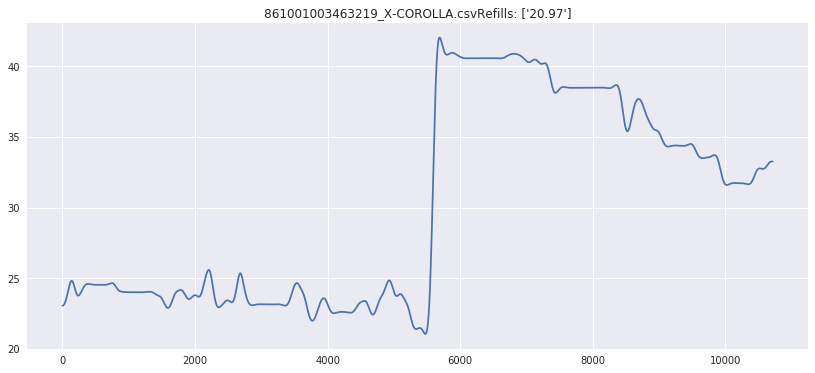

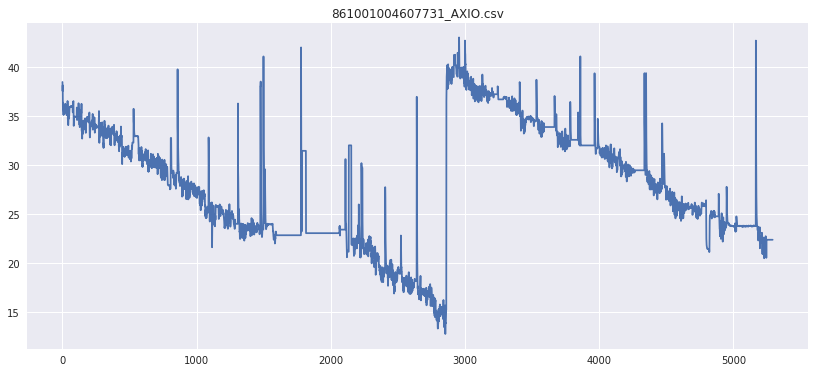

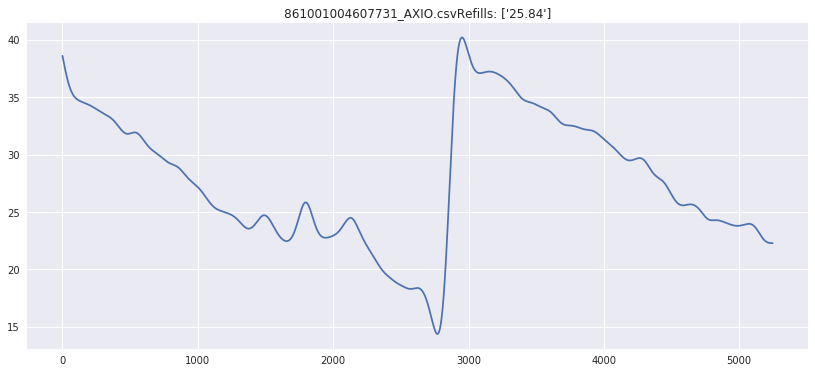

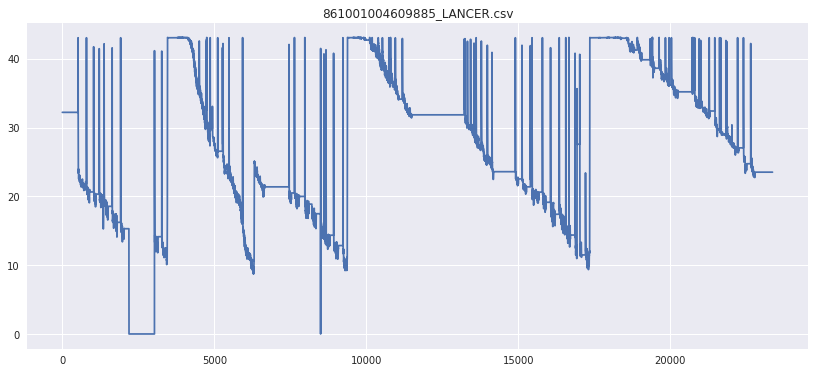

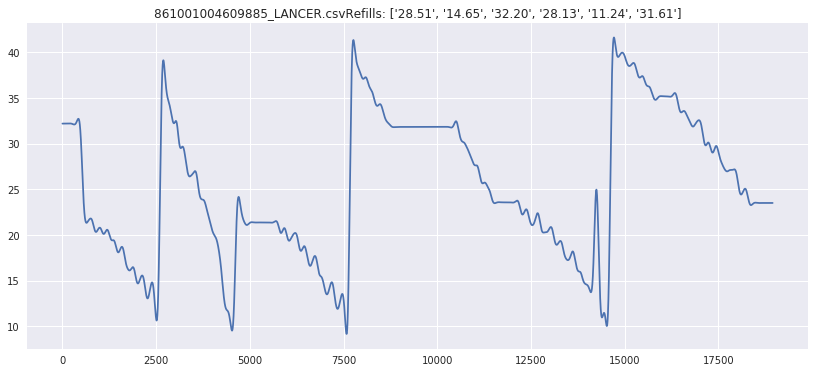

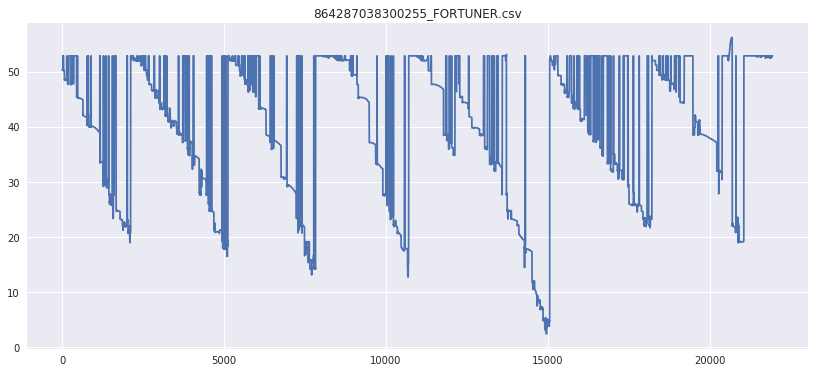

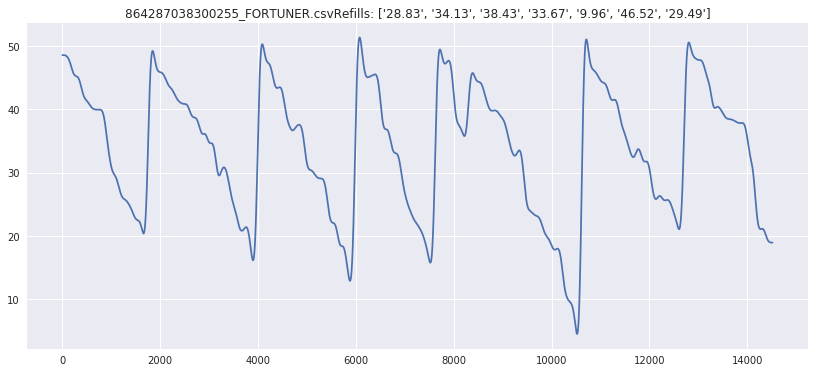

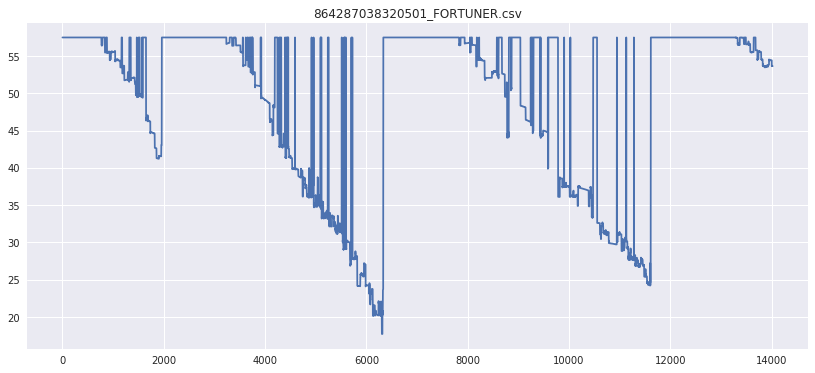

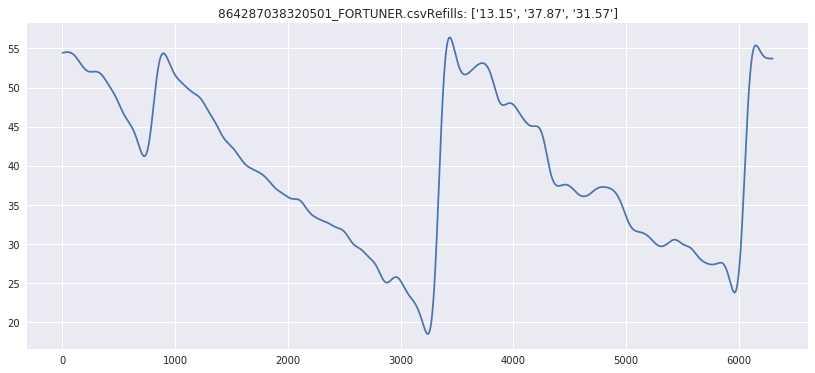

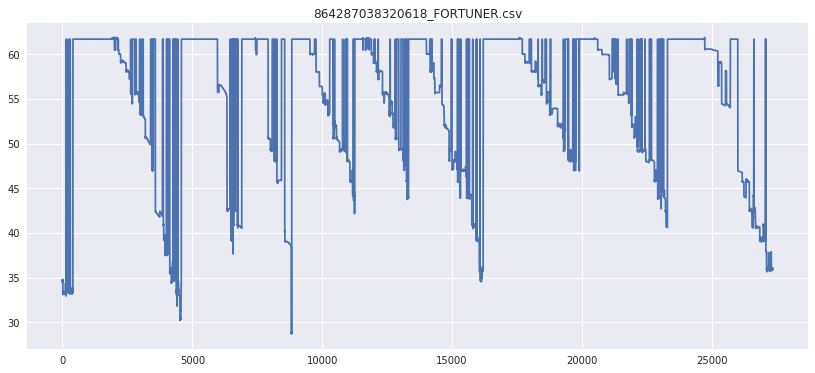

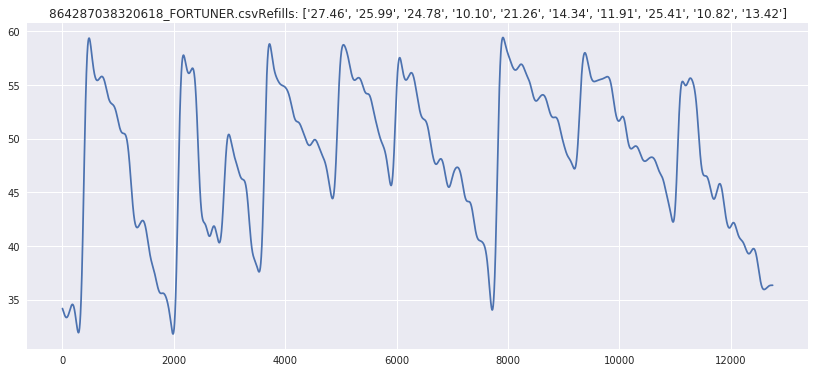

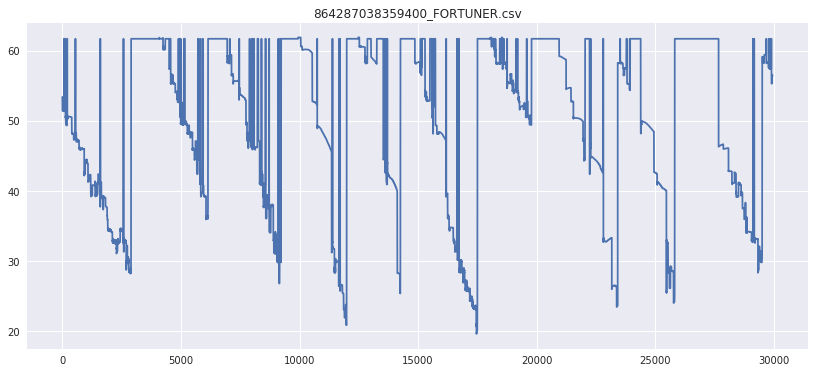

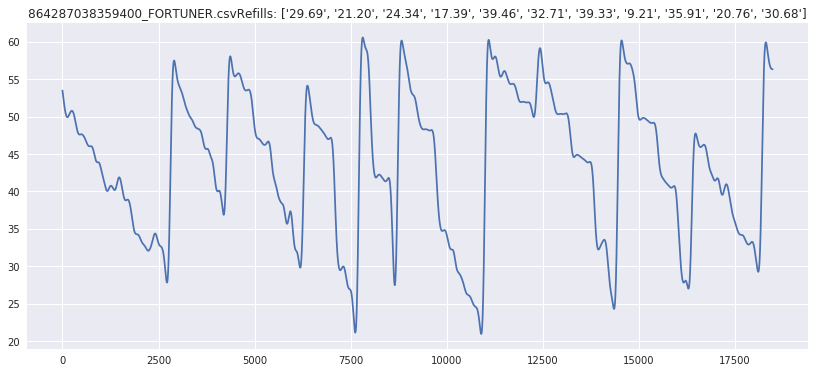

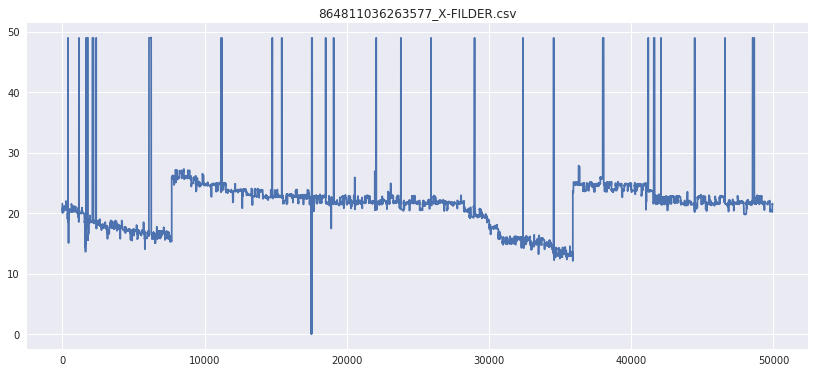

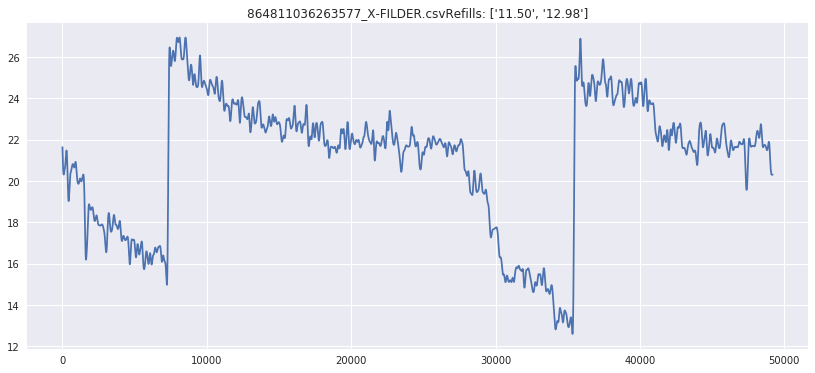

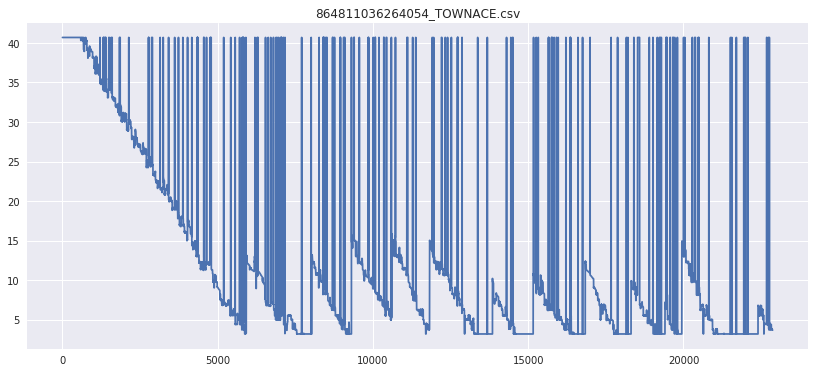

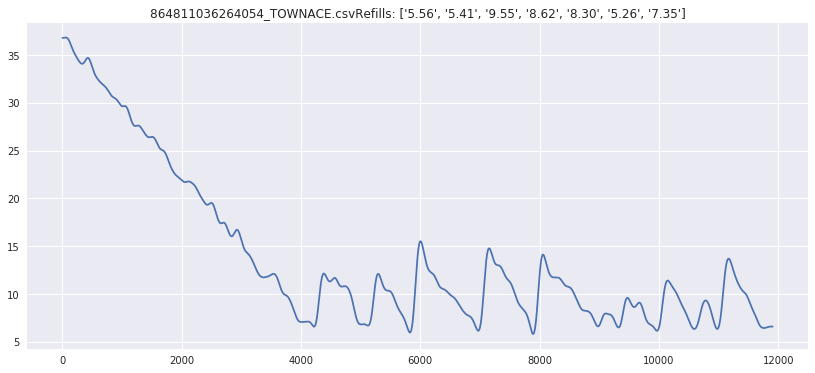

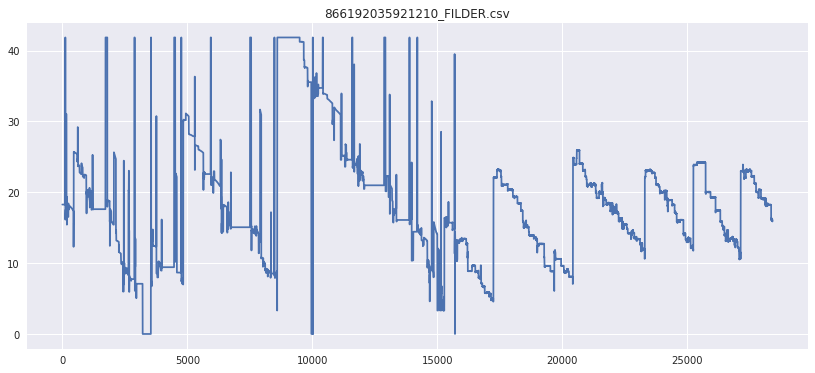

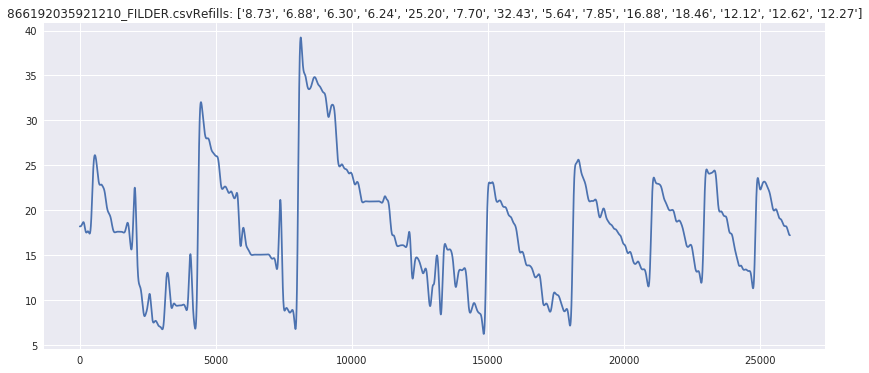

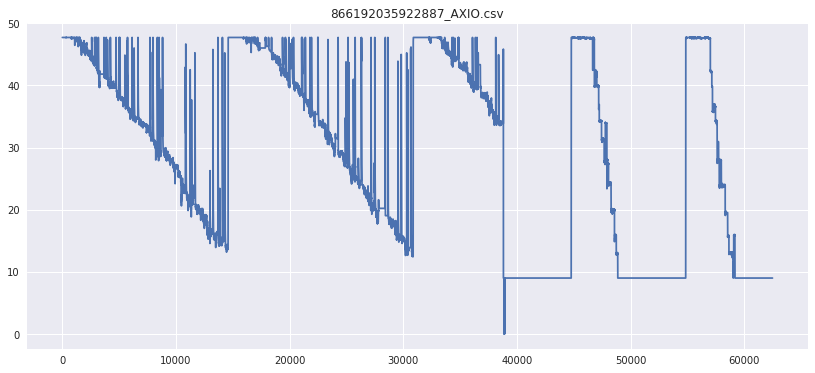

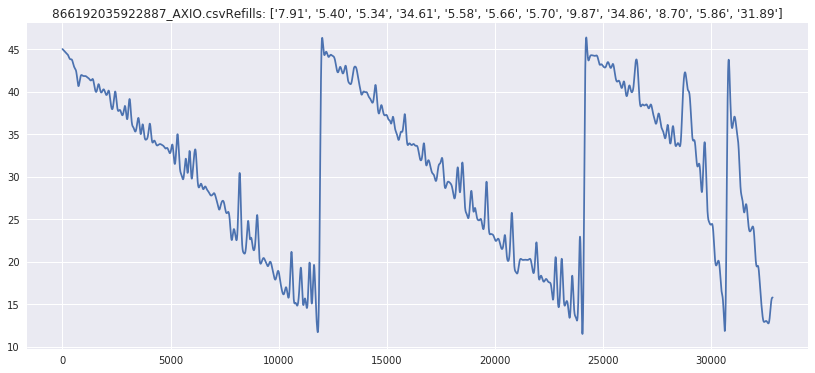

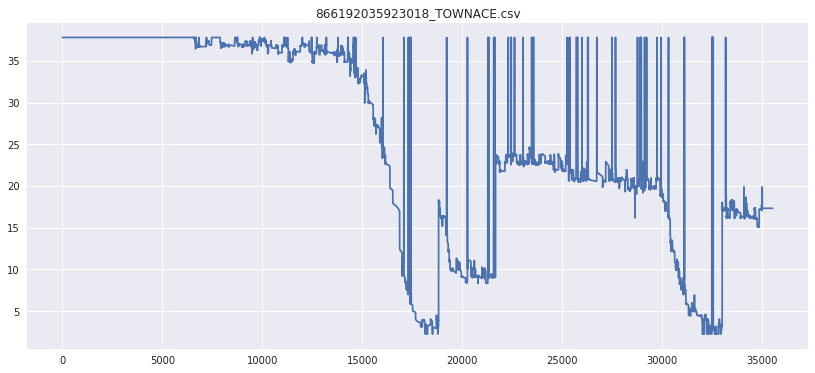

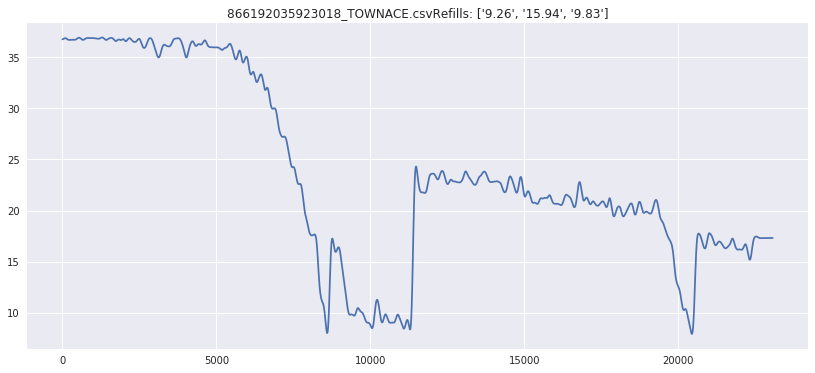

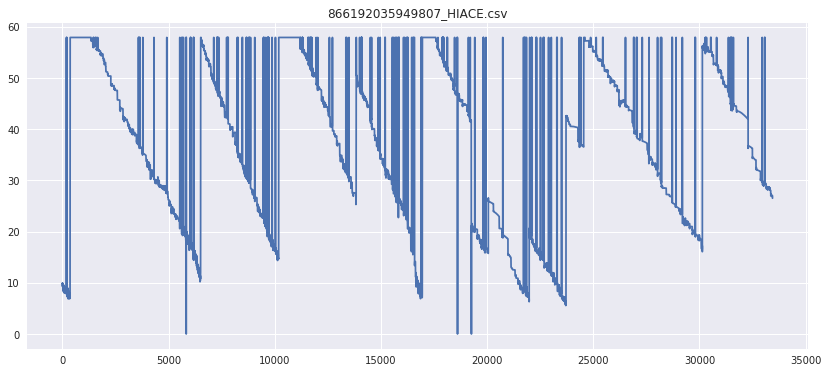

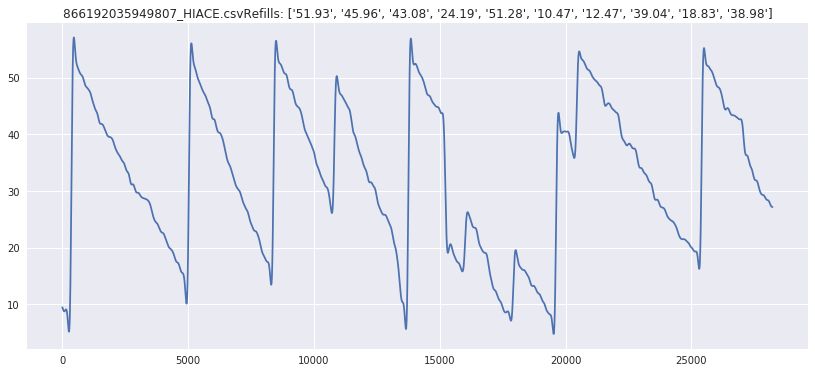

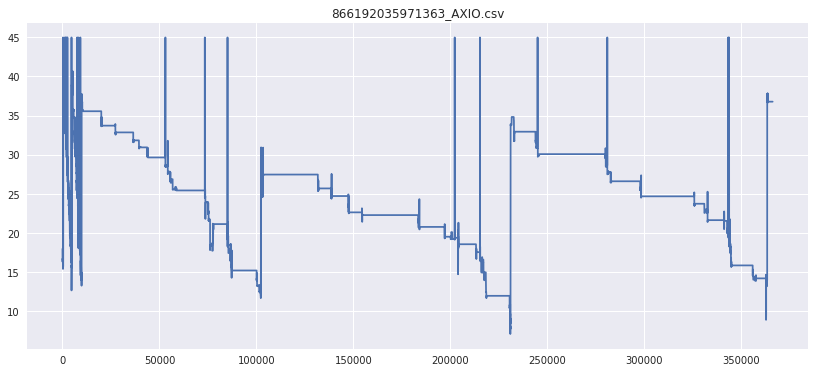

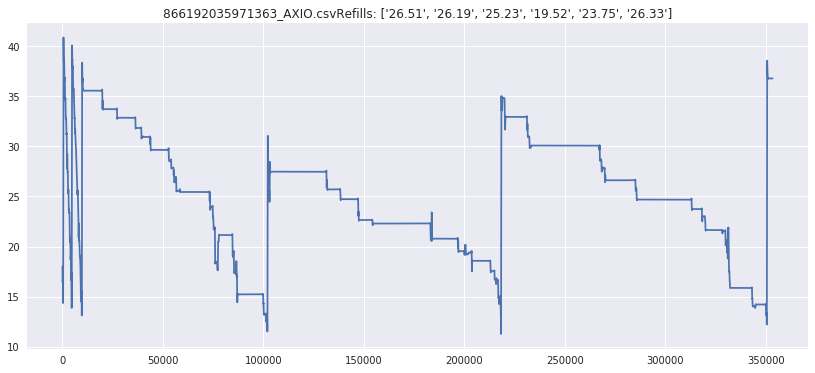

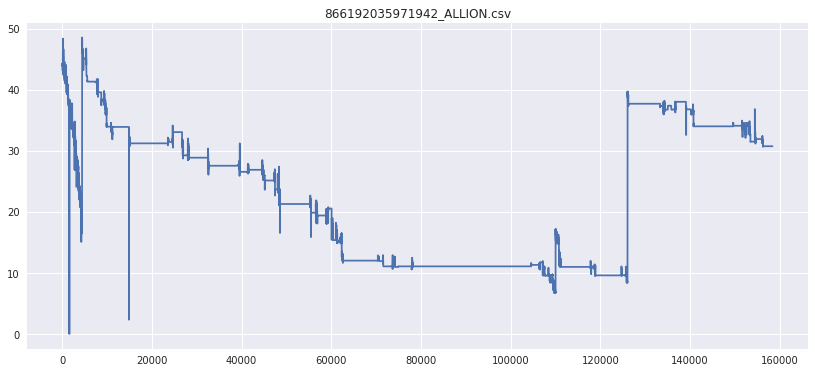

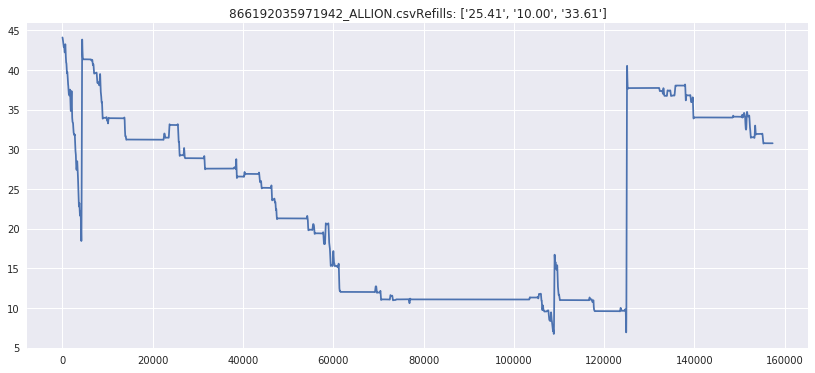

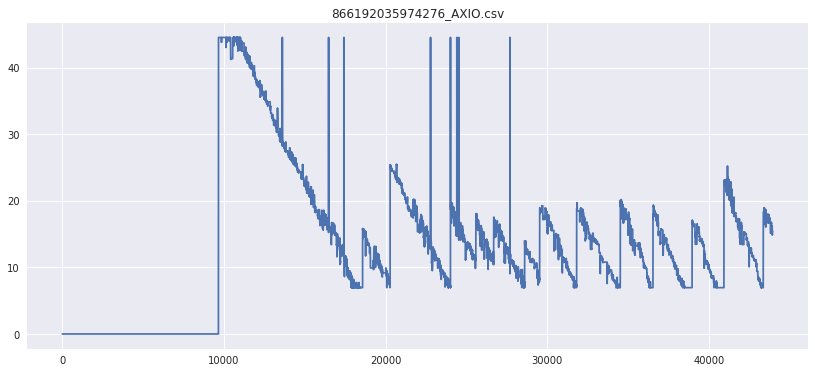

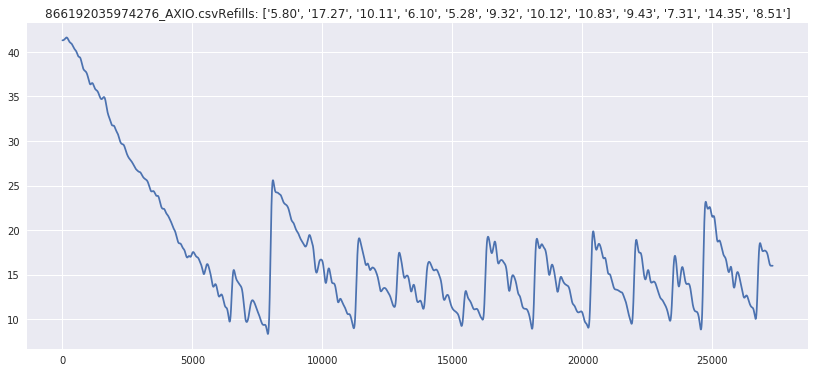

In [12]:
import scipy
import pandas as pd 
from ipywidgets import interact
from scipy.signal import argrelextrema
import os 

files = [i for i in os.listdir('files/') if 'csv' in i]

litre_limit = {'861001004607731_AXIO':(4,42),'864287038359400_FORTUNER':(8,61),'866192035922887_AXIO':(10,47),'861001003463219_X-COROLLA':(13,45),
       '861001004609885_LANCER':(4,43),'864287038300255_FORTUNER':(3,52),'864287038320501_FORTUNER':(3,57),'864287038320618_FORTUNER':(8,61),
       '864287038359400_FORTUNER':(8,61),'864811036263577_X-FILDER':(8,48),'864811036264054_TOWNACE':(4,40),
       '866192035921210_FILDER':(4,41),'866192035923018_TOWNACE':(6,39),'866192035949807_HIACE':(3,57),'866192035971363_AXIO':(10,44),
       '866192035971942_ALLION':(4,47),'866192035974276_AXIO':(7,44)}
    

# print(litre_limit['866192035974276_AXIO'])

Wn = 0.01

def apply_filter(Wn,fuel):
    N = 3
    scipy.signal.filtfilt
    b, a = scipy.signal.butter(N, Wn, 'low')
    output_signal = scipy.signal.filtfilt(b, a, fuel)
    return output_signal


def find_crest_valley(smoothed_data, extrema_order):
    '''
    Find Maxima and Minima's of the smoothed signal
    '''
    x = np.array(smoothed_data)

    # for local maxima
    maxims_ind = argrelextrema(x, np.greater, order=extrema_order)

    # for local minima
    minims_ind = argrelextrema(x, np.less, order=extrema_order)

    # find values at maxima

    ## order ## How many points on each side to use for the comparison to consider comparator(n, n+x) to be True.
    maxims = x[argrelextrema(x, np.greater, order=extrema_order)[0]] # mode default 'clip'. what is it??

    #find values at minima 
    minims = x[argrelextrema(x, np.less, order=extrema_order)[0]]
    
    return (maxims, minims, maxims_ind, minims_ind)



for ifile in files:
#     ifile = '864287038320501_FORTUNER.csv'
    try:
        min_fuel_limit,max_fuel_limit = litre_limit[ifile.split('.')[0]]
        df = pd.read_csv('files/'+ifile)
        
        raw_fuel = df.fuel_litre
        filterOne = apply_filter(Wn,raw_fuel)
        
        df2 = df[df['fuel_litre'].between(min_fuel_limit+2, max_fuel_limit-2, inclusive=False)]
        raw_modified = df2.fuel_litre
        filterTwo = apply_filter(Wn,raw_modified)
                        
        maximas,minimas,maximas_ind, minimas_ind = find_crest_valley(filterTwo, 100)
#         print('Crest - {}  Valley - {}'.format(len(maximas), len(minimas)))
#         print('Crest points: {}\nValley Points: {}'.format(maximas_ind, minimas_ind))
      
        plt.figure()
        plot(raw_fuel)
        plt.title(ifile)
        name = 'images/'+ifile.split('.')[0]+'.png'
        savefig(name)
#         plt.figure()
#         plot(filterOne)
#         plt.title('Filter One')
        
        all_refill = []
        
        for i,n in enumerate(maximas_ind[0]):
            diff = n - minimas_ind[0]
            distance = np.sort(diff[diff>0])

            if len(distance)>0:
        #         print('c- {}, v- {}'.format(n,n-distance[0]))
                refill = filterTwo[n] - filterTwo[n-distance[0]]
                if refill >= 5:
                    all_refill.append(refill)
#                     print('\n\nRefill Amount: {}'.format(refill))
            distance = []
        
        all_refill = [ '%.2f' % elem for elem in all_refill]
            
        plt.figure()
        plot(filterTwo)
        plt.title(ifile+'Refills: {}'.format(all_refill))
        name = 'images/'+ifile.split('.')[0]+'_out.png'
#         print(name)
        savefig(name)
        
#         break
        
    except:
        pass


# for i,n in enumerate(maximas_ind[0]):
#     diff = n - minimas_ind[0]
#     distance = np.sort(diff[diff>0])

#     if len(distance)>0:
# #         print('c- {}, v- {}'.format(n,n-distance[0]))
#         refill = filterTwo[n] - filterTwo[n-distance[0]]
#         if refill >= 5:
            
#             print('\n\nRefill Amount: {}'.format(refill))
#     distance = []
    

In [ ]:
filterTwo

## Find Peaks with - 
http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb 

In [ ]:
from __future__ import division, print_function
import numpy as np

__author__ = "Marcos Duarte, https://github.com/demotu/BMC"
__version__ = "1.0.4"
__license__ = "MIT"


def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=False, ax=None):

    """Detect peaks in data based on their amplitude and other features.

    Parameters
    ----------
    x : 1D array_like
        data.
    mph : {None, number}, optional (default = None)
        detect peaks that are greater than minimum peak height.
    mpd : positive integer, optional (default = 1)
        detect peaks that are at least separated by minimum peak distance (in
        number of data).
    threshold : positive number, optional (default = 0)
        detect peaks (valleys) that are greater (smaller) than `threshold`
        in relation to their immediate neighbors.
    edge : {None, 'rising', 'falling', 'both'}, optional (default = 'rising')
        for a flat peak, keep only the rising edge ('rising'), only the
        falling edge ('falling'), both edges ('both'), or don't detect a
        flat peak (None).
    kpsh : bool, optional (default = False)
        keep peaks with same height even if they are closer than `mpd`.
    valley : bool, optional (default = False)
        if True (1), detect valleys (local minima) instead of peaks.
    show : bool, optional (default = False)
        if True (1), plot data in matplotlib figure.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    ind : 1D array_like
        indeces of the peaks in `x`.

    Notes
    -----
    The detection of valleys instead of peaks is performed internally by simply
    negating the data: `ind_valleys = detect_peaks(-x)`
    
    The function can handle NaN's 

    See this IPython Notebook [1]_.

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/DetectPeaks.ipynb

    Examples
    --------
    >>> from detect_peaks import detect_peaks
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)

    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=0, mpd=20, valley=True, show=True)

    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)

    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)
    """

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan-1, indnan+1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size-1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        dx = np.min(np.vstack([x[ind]-x[ind-1], x[ind]-x[ind+1]]), axis=0)
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                    & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind


def _plot(x, mph, mpd, threshold, edge, valley, ax, ind):
    """Plot results of the detect_peaks function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 4))

        ax.plot(x, 'b', lw=1)
        if ind.size:
            label = 'valley' if valley else 'peak'
            label = label + 's' if ind.size > 1 else label
            ax.plot(ind, x[ind], '+', mfc=None, mec='r', mew=2, ms=8,
                    label='%d %s' % (ind.size, label))
            ax.legend(loc='best', framealpha=.5, numpoints=1)
        ax.set_xlim(-.02*x.size, x.size*1.02-1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
        ax.set_xlabel('Data #', fontsize=14)
        ax.set_ylabel('Amplitude', fontsize=14)
        mode = 'Valley detection' if valley else 'Peak detection'
        ax.set_title("%s (mph=%s, mpd=%d, threshold=%s, edge='%s')"
                     % (mode, str(mph), mpd, str(threshold), edge))
        # plt.grid()
        plt.show()
        
        


In [ ]:
from detect_peaks import detect_peaks
x = np.random.randn(100)
x[60:81] = np.nan
# detect all peaks and plot data
ind = detect_peaks(filterTwo,mph =5,mpd=1000, show=True)
print(ind)

# x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
# # set minimum peak height = 0 and minimum peak distance = 20
# detect_peaks(filterTwo, mph=0, mpd=20, show=True)

# x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
# # set minimum peak distance = 2
# detect_peaks(filterTwo, mpd=2, show=True)

# x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
# # detection of valleys instead of peaks
# detect_peaks(filterTwo, mph=0, mpd=20, valley=True, show=True)

# x = [0, 1, 1, 0, 1, 1, 0]
# # detect both edges
# detect_peaks(filterTwo, edge='both', show=True)

# x = [-2, 1, -2, 2, 1, 1, 3, 0]
# # set threshold = 2
# detect_peaks(filterTwo, threshold = 2, show=True)

In [32]:
import scipy
import pandas as pd 
from ipywidgets import interact
from scipy.signal import argrelextrema
import os
from sys import argv


# fuel_data = argv[2]
# timestams = argv[1]
# min_fuel_limit = argv[3]
# max_fuel_limit = argv[4]
ifile = '864287038320501_FORTUNER.csv'
df2 = pd.read_csv('files/'+ifile)

fuel_data = df2.fuel_litre
timestamps = df2.created_at
engine_status = df2.engine_status
min_fuel_limit = 8
max_fuel_limit = 40

Wn = 0.01

def apply_filter(Wn,fuel):
    N = 3
    scipy.signal.filtfilt
    b, a = scipy.signal.butter(N, Wn, 'low')
    output_signal = scipy.signal.filtfilt(b, a, fuel)
    return output_signal


def find_crest_valley(smoothed_data, extrema_order):
    '''
    Find Maxima and Minima's of the smoothed signal
    '''
    x = np.array(smoothed_data)

    # for local maxima
    maxims_ind = argrelextrema(x, np.greater, order=extrema_order)

    # for local minima
    minims_ind = argrelextrema(x, np.less, order=extrema_order)

    # find values at maxima

    ## order ## How many points on each side to use for the comparison to consider comparator(n, n+x) to be True.
    maxims = x[argrelextrema(x, np.greater, order=extrema_order)[0]] # mode default 'clip'. what is it??

    #find values at minima 
    minims = x[argrelextrema(x, np.less, order=extrema_order)[0]]
    
    return (maxims, minims, maxims_ind, minims_ind)



#for ifile in files:
#     ifile = '864287038320501_FORTUNER.csv'

df = pd.DataFrame({'fuel': fuel_data,
                   'engine': engine_status,
                   'created_at': timestamps})

df_updated = df[df['fuel'].between(min_fuel_limit+2, max_fuel_limit-2, inclusive=False)]
fuel_updated = df_updated.fuel
fuel_filtered = apply_filter(Wn,fuel_updated)
maximas,minimas,maximas_ind, minimas_ind = find_crest_valley(fuel_filtered, 100)
# print('Crest - {}  Valley - {}'.format(len(maximas), len(minimas)))
# print('Crest points: {}\nValley Points: {}'.format(maximas_ind, minimas_ind))

#     plt.figure()
#     plot(raw_fuel)
#     plt.title(ifile)
#     name = 'images/'+ifile.split('.')[0]+'.png'
#     savefig(name)
# plt.figure()
# plot(fuel_filtered)
#     plt.title('Filter One')

all_refill = []

for i,n in enumerate(maximas_ind[0]):
    diff = n - minimas_ind[0]
    distance = np.sort(diff[diff>0])

    if len(distance)>0:
#         print('c- {}, v- {}'.format(n,n-distance[0]))
        refill = fuel_filtered[n] - fuel_filtered[n-distance[0]]
        if refill >= 5:
            all_refill.append(refill)
#             print('\n\nRefill Amount: {}'.format(refill))
    distance = []

all_refill = [ '%.2f' % elem for elem in all_refill]
print(all_refill)



Refill Amount: 18.975097396433334
['18.98']
